**<h1 align=center><font size = 5>Red Wine Multi-Class Regression</font></h1>**

<br>

<img src="https://learn.winecoolerdirect.com/wp-content/uploads/2015/07/red-wine.jpg" alt="wine">

<small>Picture Source:<a href="https://learn.winecoolerdirect.com/red-wine/"> Wine Cooler Direct</a></small>

<br>

<h2>Data Set Information:</h2>

<p>The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: <a href="https://www.vinhoverde.pt/en/">Web Link</a> or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.</p>

<br>

<h2>Attribute Information</h2>

<p>For more information, read [Cortez et al., 2009]. Input variables (based on physicochemical tests):</p>

<ol>
  <li>fixed acidity</li>
  <li>volatile acidity</li>
  <li>citric acid</li>
  <li>residual sugar</li>
  <li>chlorides</li>
  <li>free sulfur dioxide</li>
  <li>total sulfur dioxide</li>
  <li>density</li>
  <li>pH</li>
  <li>sulphates</li>
  <li>alcohol</li>
  <li><b>Output variable (based on sensory data): quality (score between 0 and 10)</b></li>
</ol>

<br>

<h2>Acknowledgements</h2>

<p>This dataset has been referred from <a href="https://archive.ics.uci.edu/ml/datasets/Wine+Quality">archive.ics.uci.edu</a>.</p>

<br>

<h2>Relevant Papers</h2>

<p>P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

Available at: <a href="https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub">sciencedirect.com</a></p>

<br>

<h2>Keywords</h2>

<ul>
  <li>Wine</li>
  <li>Regression</li>
  <li>Machine Learning</li>
  <li>Quality Test</li>
</ul>

<br>

<h1>Objective for this Notebook</h1>

<p>Within the scope of this project, first we understand the Dataset & cleanup (if required). After that, we had tried to predict <code>quality</code> score based on independent variables.</p>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="https://#importing_libraries">Importing Libraries</a></li>
<li><a href="https://#data_preprocessing">Data Preprocessing</a></li>
<li><a href="https://#multiple_regression">Multiple Regression</a></li>
<li><a href="https://#prediction">Making Predictions</a></li>
<li><a href="https://#save_and_load">Saving & Loading Model</a></li>

<br>

<p></p>
Estimated Time Needed: <strong>20 min</strong>
</div>

<br>

<a id="importing_libraries"></a>

<h2 align=center>Importing Libraries</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
sklearn.__version__

'1.0.2'

<br>

<a id="data_preprocessing"></a>

<h2 align=center>Data Preprocessing</h2>

In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

--2022-12-27 22:32:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K  --.-KB/s    in 0.1s    

2022-12-27 22:32:29 (607 KB/s) - ‘winequality-red.csv’ saved [84199/84199]



In [4]:
df = pd.read_csv('winequality-red.csv', sep=';')

In [5]:
bins = [0, 5.5, 7.5, 10] # 3-5 are low, 6-7 are mid, 8-9 are high quality
labels = [0, 1, 2]
df['target'] = pd.cut(df['quality'], bins=bins, labels=labels)

In [6]:
df["target"].unique()

[0, 1, 2]
Categories (3, int64): [0 < 1 < 2]

In [7]:
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [8]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,1


In [9]:
df.shape

(1599, 13)

In [10]:
print("Number of NaN values: {}.".format(df.isnull().sum().sum()))

print("Number of duplicated rows: {}.".format(df.duplicated().sum()))

Number of NaN values: 0.
Number of duplicated rows: 240.


In [11]:
dp = df[df.duplicated(keep=False)]
dp.head(2)
df.drop_duplicates(inplace= True)
print("Number of duplicated rows: {}.".format(df.duplicated().sum()))

Number of duplicated rows: 0.


In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1359 non-null   float64 
 1   volatile acidity      1359 non-null   float64 
 2   citric acid           1359 non-null   float64 
 3   residual sugar        1359 non-null   float64 
 4   chlorides             1359 non-null   float64 
 5   free sulfur dioxide   1359 non-null   float64 
 6   total sulfur dioxide  1359 non-null   float64 
 7   density               1359 non-null   float64 
 8   pH                    1359 non-null   float64 
 9   sulphates             1359 non-null   float64 
 10  alcohol               1359 non-null   float64 
 11  quality               1359 non-null   int64   
 12  target                1359 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 139.5 KB


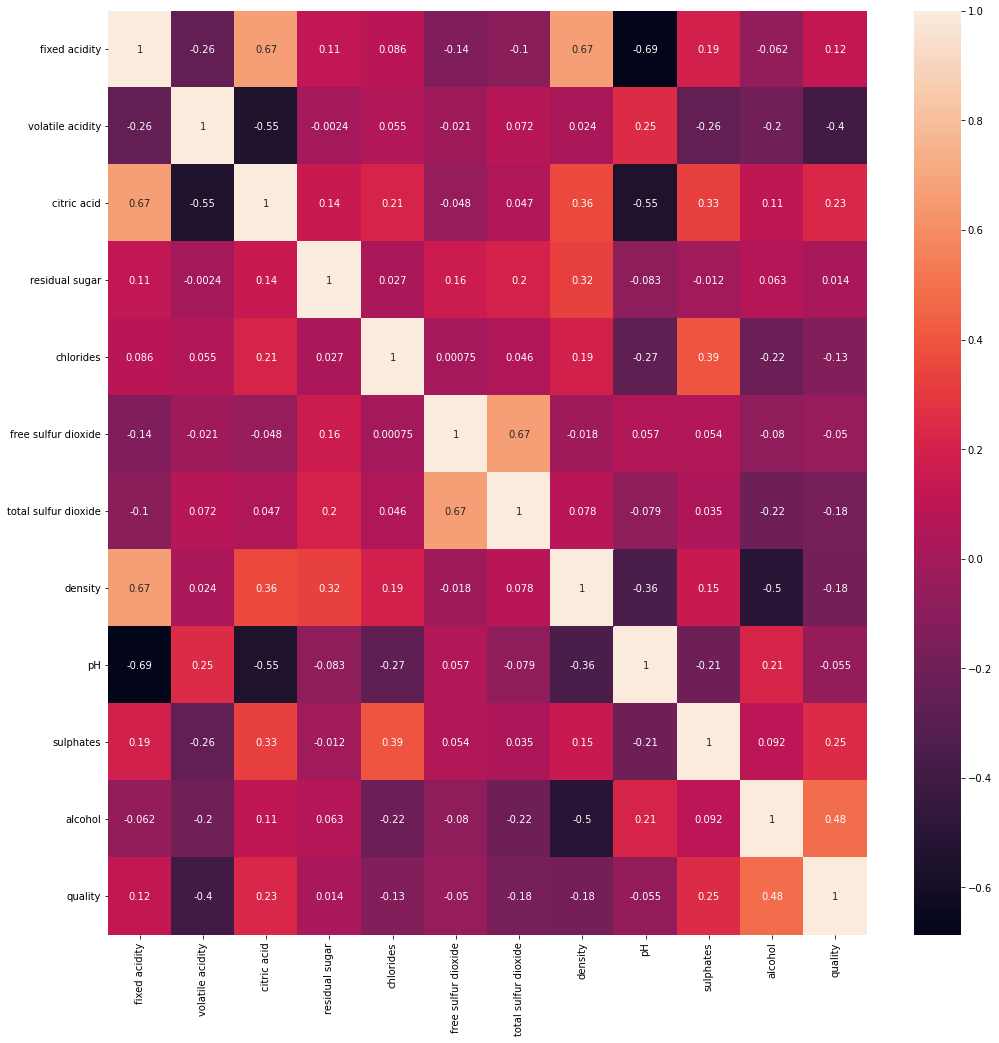

In [14]:
plt.figure(figsize = (17, 17))
sns.heatmap(df.corr(), annot=True)

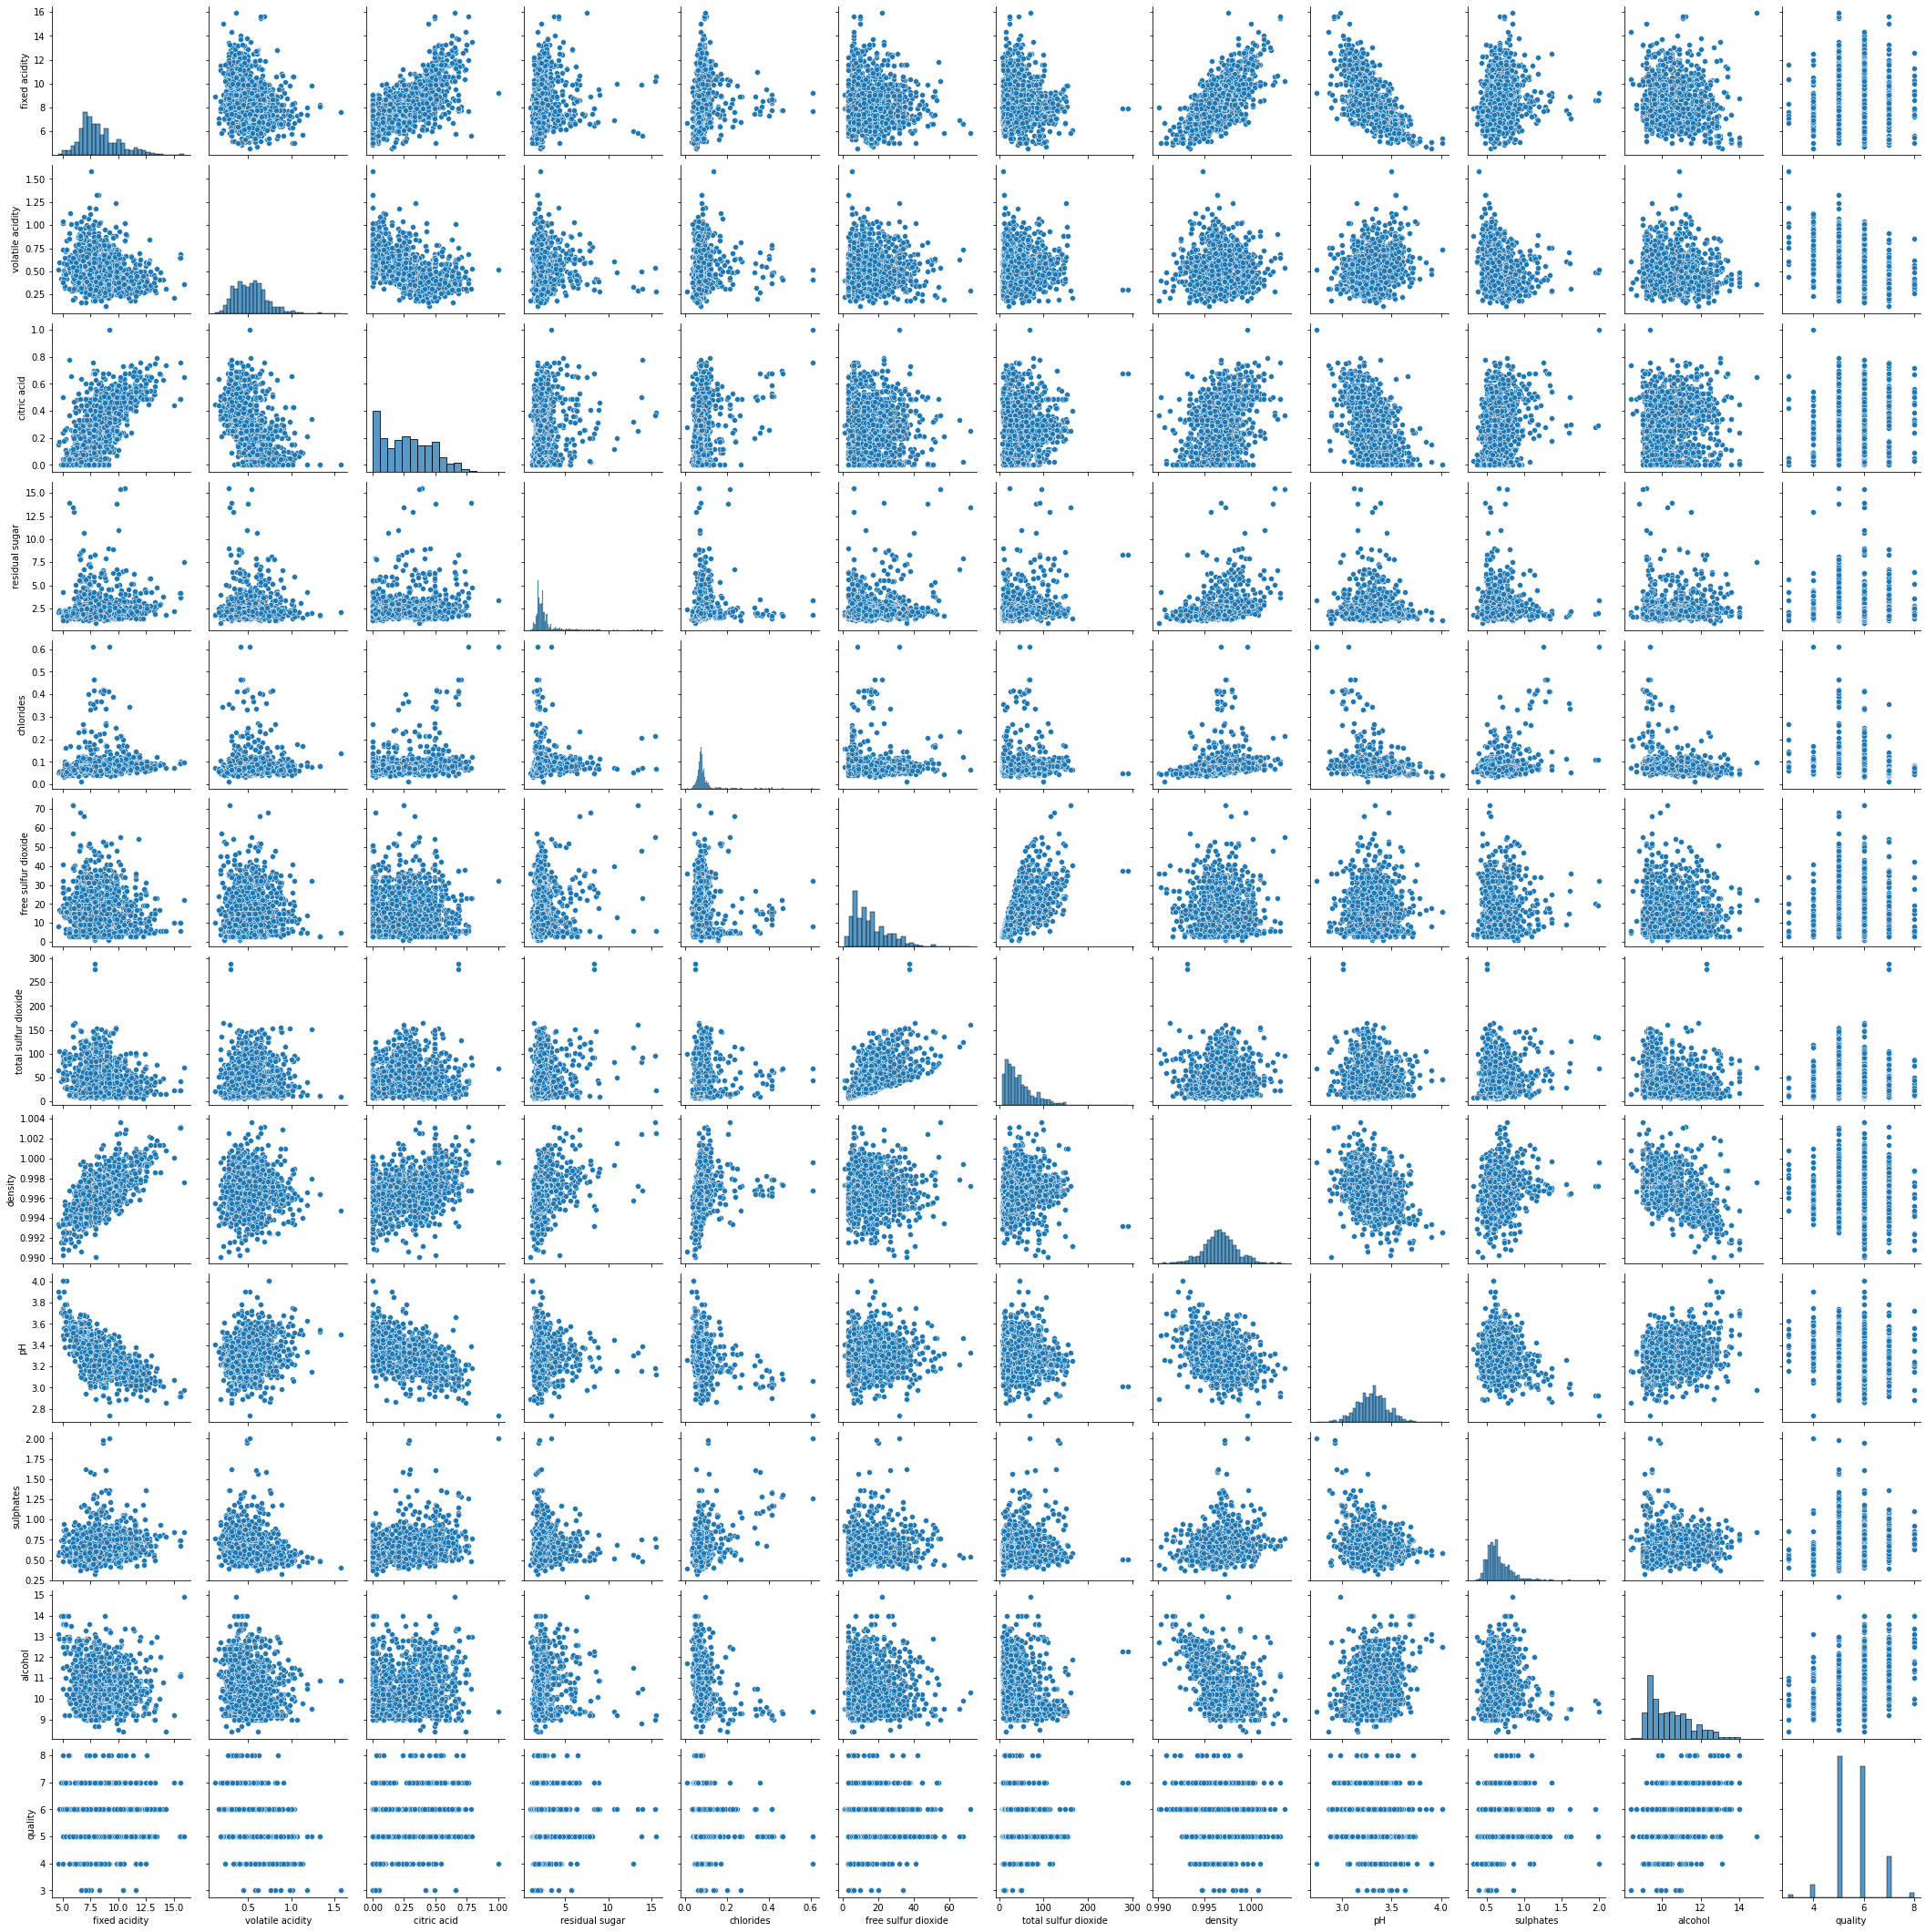

In [15]:
sns.pairplot(df)
plt.show()

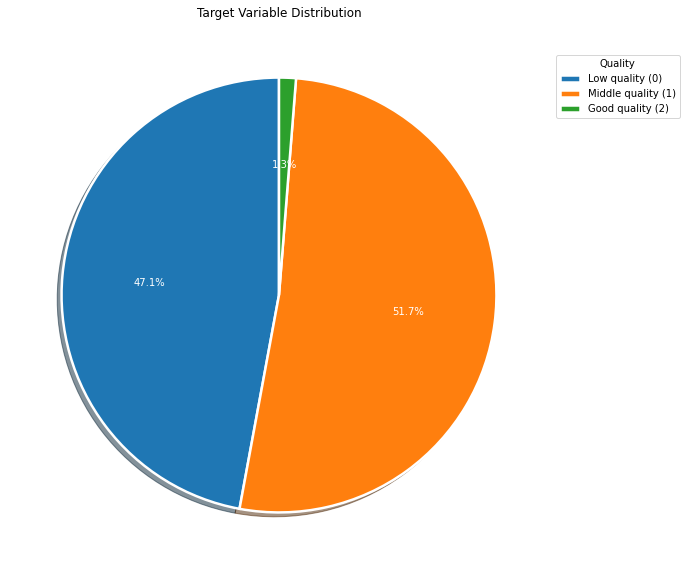

In [16]:
import matplotlib.patheffects as path_effects

fig = plt.figure(figsize = (17, 10), facecolor='w')
out_df=pd.DataFrame(df.groupby('target')['target'].count())

patches, texts, autotexts = plt.pie(out_df['target'], autopct='%1.1f%%',
                                    textprops={'color': "w"},
                                    startangle=90, shadow=True)

for patch in patches:
    patch.set_path_effects({path_effects.Stroke(linewidth=2.5,
                                                foreground='w')})
plt.title('Target Variable Distribution')
plt.legend(labels=["Low quality (0)", "Middle quality (1)", "Good quality (2)"], bbox_to_anchor=(1., .95), title="Quality")

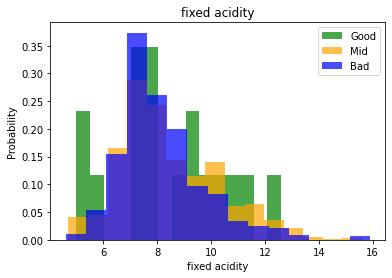

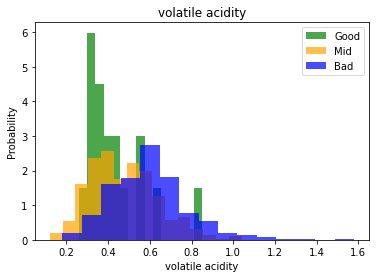

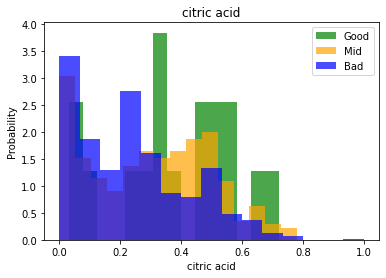

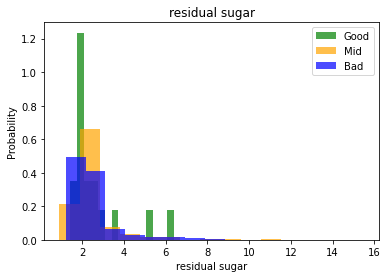

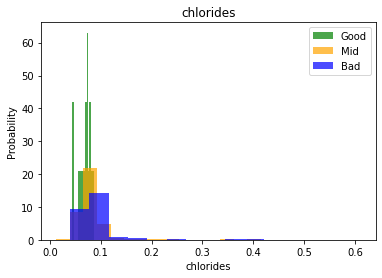

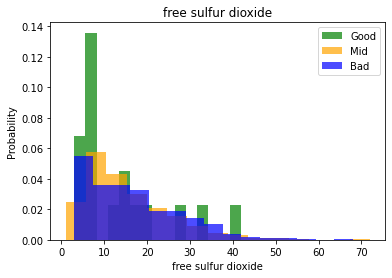

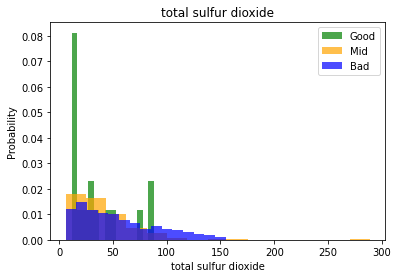

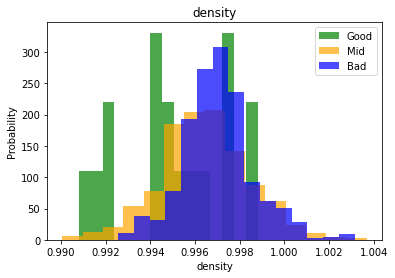

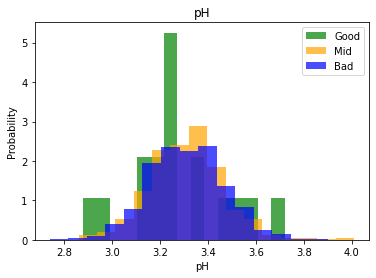

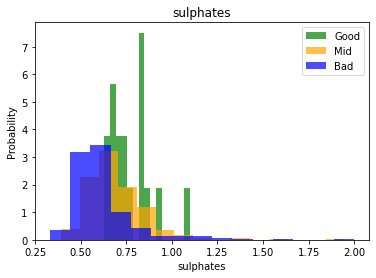

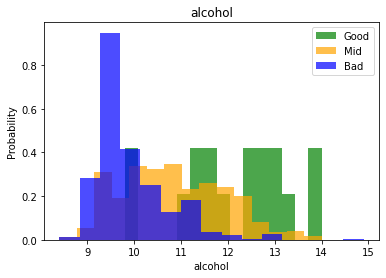

In [17]:
for i in range(11):
  label = df.columns[i]
  plt.hist(df[df['target']==2][label], color='green', label="Good", 
           alpha=0.7, density=True, bins=15) # Good quality
  plt.hist(df[df['target']==1][label], color='orange', label="Mid", 
           alpha=0.7, density=True, bins=15) # Mid quality
  plt.hist(df[df['target']==0][label], color='blue', label="Bad", 
           alpha=0.7, density=True, bins=15) # Bad quality
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

<br>

<h4>Test Train Split</h4>

<p>Creating train and test dataset Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing. Let's split our dataset into train and test sets. Around 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using the np.random.rand() function:</p>

<br>

In [18]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [19]:
train.shape

(1091, 13)

In [20]:
test.shape

(268, 13)

<br>

<a id="multiple_regression"></a>

<h2 align=center>Multiple Regression</h2>


<p>Multiple regression is a statistical technique that can be used to analyze the relationship between a single dependent variable and several independent variables. The objective of multiple regression analysis is to use the independent variables whose values are known to predict the value of the single dependent value.</p>

<br>

$$y_i = β_0 + β_1x_{i1} + β_2x_{i2} + ... + β_p x_{ip} + ϵ $$

<br>

$y_i$ = dependent variable

$x_i$ = independent variable

$β_0$ = y-intercept

$β_p$ = slope coefficients for each independent variable

$ϵ$ = error of the model (residuals)

<br>

In [21]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [22]:
X = train.drop("target", axis=1)
Y = train["target"]
regr.fit(X, Y)

LinearRegression()

In [23]:
print('Coefficients: ', regr.coef_)

Coefficients:  [ 1.30535307e-03  4.57531838e-02 -2.39954325e-02 -2.33143448e-03
  1.27132401e-01  1.97102859e-03 -1.38120730e-03  1.48061474e+00
  6.66689786e-02  8.05478152e-03  1.58342230e-02  5.54914218e-01]


In [24]:
print('Intercept: ', regr.intercept_)

Intercept:  -4.4476877933421575


In [25]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [26]:
Y

0       0
1       0
2       0
3       1
6       0
       ..
1592    1
1593    1
1595    1
1597    0
1598    1
Name: target, Length: 1091, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [27]:
y_hat = regr.predict(test.drop("target", axis = 1))
x = np.asanyarray(test.drop("target", axis = 1))
y = np.asanyarray(test["target"])

In [28]:
x

array([[ 7.4  ,  0.66 ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.58 ,  0.02 , ...,  0.57 ,  9.5  ,  7.   ],
       [ 7.6  ,  0.39 ,  0.31 , ...,  0.65 ,  9.7  ,  5.   ],
       ...,
       [ 6.6  ,  0.725,  0.2  , ...,  0.54 ,  9.2  ,  5.   ],
       [ 5.4  ,  0.74 ,  0.09 , ...,  0.56 , 11.6  ,  6.   ],
       [ 6.2  ,  0.6  ,  0.08 , ...,  0.58 , 10.5  ,  5.   ]])

In [29]:
y

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0])

In [30]:
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

Residual sum of squares: 0.06


In [31]:
print('Variance score: %.3f' % regr.score(x, y)) # 1 is perfect prediction

Variance score: 0.762


<br>

<a id="prediction"></a>

<h2 align=center>Making Predictions</h2>

In [32]:
regr.predict(x[5:6])

array([0.19432694])

In [33]:
print('Actual value: {}'.format(y[5:6]))

Actual value: [0]


In [34]:
print('Error: {}'.format((regr.predict(x[5:6]) - y[5:6]) ** 2))

Error: [0.03776296]


In [35]:
regr.predict(x[3:4])

array([0.12860172])

In [36]:
print('Actual value: {}'.format(y[3:4]))

Actual value: [0]


In [37]:
print('Error: {}'.format((regr.predict(x[3:4]) - y[3:4]) ** 2))

Error: [0.0165384]


<br>

<a id="save_and_load"></a>

<h2 align=center>Saving & Loading Model</h2>

In [38]:
import pickle
file = "regr.save"
pickle.dump(regr, open(file, 'wb'))

In [39]:
downloaded_data = pickle.load(open(file, 'rb'))
print(downloaded_data.predict(x))

[ 0.20717132  1.32534663  0.17099164  0.12860172  0.76031833  0.19432694
  0.19730882  0.7267574   0.15746858 -0.37543307 -0.33108437  0.10906656
  0.17000991  0.19321706  0.08219023  1.30477789  0.19292605  0.19024117
  0.70282007  0.22006616  0.15247912  0.78001894  0.14465066  0.09694809
  0.22399931  0.70318298  0.75924896  0.80166663  0.17078112  0.18933158
  0.17141881  0.1606247   0.03429548  0.03661763  0.73923341 -0.2960014
  0.73381901  0.10565308  0.2193495  -0.36961946  0.72928409  0.21135396
  0.74591879  0.07384349  0.18841592  0.15869949  1.32168778  0.16851779
  0.15461872  0.73374124  0.69715693  0.73452289  0.20220164  0.71365676
  0.73858286  1.38609771  0.21064311  0.20017834  0.72586777  0.11761443
  0.71397411  1.32845611  0.76237217  0.78959517  0.1877597   0.76091871
  0.74378608 -0.38270818  0.77951361  0.18226264  0.18508987  0.75427096
  0.13998178  1.91430814  0.20679981  0.05787326  0.75961707  0.73614622
  1.87413562  0.78073489  1.35725347  1.30888866  1.

<br>

<h1>Contact Me<h1>
<p>If you have something to say to me please contact me:</p>

<ul>
  <li>Twitter: <a href="https://twitter.com/Doguilmak">Doguilmak</a></li>
  <li>Mail address: doguilmak@gmail.com</li>
</ul>

In [40]:
from datetime import datetime
print(f"Changes have been made to the project on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Changes have been made to the project on 2022-12-27 22:33:30
